<a href="https://colab.research.google.com/github/ambroz72/Machine-learning-miniproject/blob/master/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("fraud_detection_dataset.csv")

In [4]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction_ID        10000 non-null  int64  
 1   Customer_ID           10000 non-null  int64  
 2   Transaction_Amount    10000 non-null  float64
 3   Transaction_Type      10000 non-null  object 
 4   Transaction_Location  10000 non-null  object 
 5   Transaction_Time      10000 non-null  object 
 6   Customer_Account_Age  10000 non-null  int64  
 7   Past_Fraud_Count      10000 non-null  int64  
 8   Device_Used           10000 non-null  object 
 9   Fraudulent            10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
# Show first few rows
df.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Type,Transaction_Location,Transaction_Time,Customer_Account_Age,Past_Fraud_Count,Device_Used,Fraudulent
0,1,4174,3155.70,Bank Transfer,India,01/01/2024 00:00,8,1,Desktop,0
1,2,4507,2280.97,In-Store,France,01/01/2024 00:01,6,4,Laptop,0
2,3,1860,2412.68,Online,UK,01/01/2024 00:02,9,4,Desktop,0
3,4,2294,3790.09,Online,UK,01/01/2024 00:03,4,3,Mobile,0
4,5,2130,1413.18,In-Store,Germany,01/01/2024 00:04,5,0,Desktop,0


In [13]:
# Step 2: Check for Missing Values

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
Transaction_ID,0
Customer_ID,0
Transaction_Amount,0
Transaction_Type,0
Transaction_Location,0
Transaction_Time,0
Customer_Account_Age,0
Past_Fraud_Count,0
Device_Used,0
Fraudulent,0


In [10]:
# Display only columns with missing values
missing_values[missing_values > 0]

,0


In [11]:
# Step 3: Check for Duplicate Rows

In [14]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [15]:
# Step 4: Check Class Distribution (Fraud vs. Non-Fraud Cases)

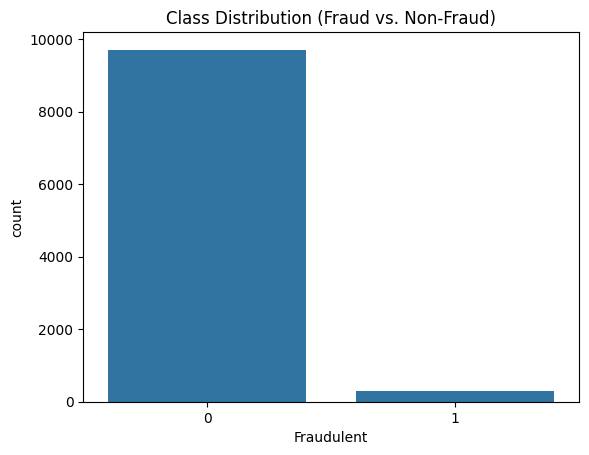

Fraudulent
0    97.11
1     2.89
Name: proportion, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of fraudulent vs. non-fraudulent transactions
sns.countplot(x="Fraudulent", data=df)
plt.title("Class Distribution (Fraud vs. Non-Fraud)")
plt.show()

# Display fraud percentage
fraud_percentage = df["Fraudulent"].value_counts(normalize=True) * 100
print(fraud_percentage)


In [17]:
# Step 5: Statistical Summary of Numerical Columns

In [18]:
# Summary statistics
df.describe()

,Transaction_ID,Customer_ID,Transaction_Amount,Customer_Account_Age,Past_Fraud_Count,Fraudulent
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,2483.188911,5.054500,2.002000,0.028900
std,2886.89568,1152.371939,1440.284767,2.569901,1.419858,0.167534
min,1.00000,1000.000000,5.260000,1.000000,0.000000,0.000000
25%,2500.75000,2001.750000,1235.930000,3.000000,1.000000,0.000000
50%,5000.50000,3004.000000,2455.270000,5.000000,2.000000,0.000000
75%,7500.25000,4010.000000,3743.157500,7.000000,3.000000,0.000000
max,10000.00000,4999.000000,4999.030000,9.000000,4.000000,1.000000


In [19]:
# Step 6: Detect Correlation Between Features

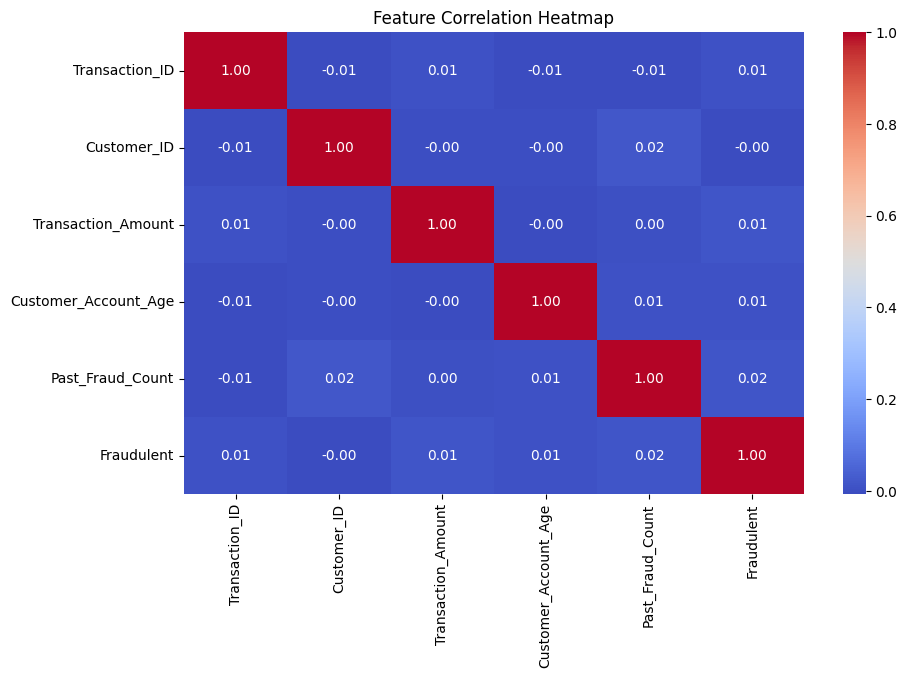

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [22]:
# Step 7: Detect Outliers Using Box Plots

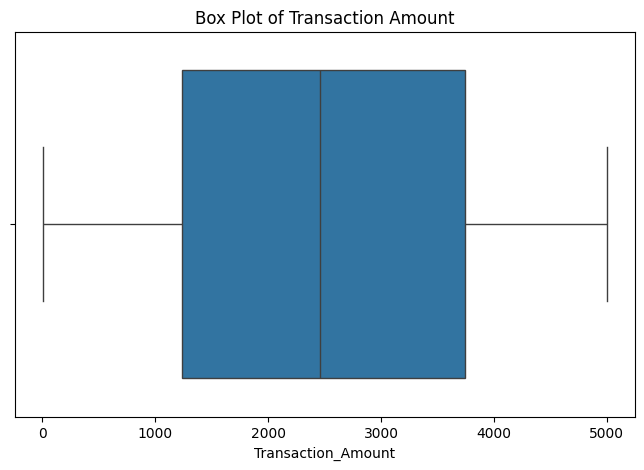

In [23]:
# Boxplot for Transaction Amount (to detect outliers)
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Transaction_Amount"])
plt.title("Box Plot of Transaction Amount")
plt.show()

In [24]:
# Step 8: Visualize Fraud Cases Based on Transaction Amount

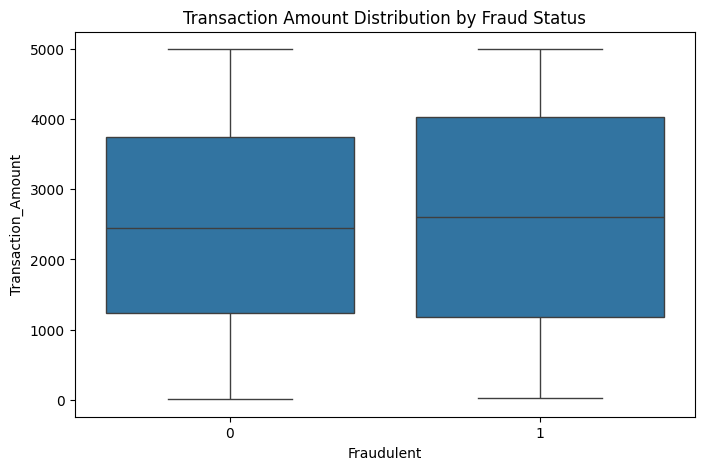

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Fraudulent", y="Transaction_Amount", data=df)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.show()